In [33]:
# contingency_table.loc['alcohol', [False, True]] = 15391
print(contingency_table)

tip                False    True 
department                       
alcohol            15391    66754
babies            110400   108596
bakery            375143   238201
beverages         864297   538026
breakfast         193967   176053
bulk                8045     9991
canned goods      351018   209170
dairy eggs       1432951  1383079
deli              314704   231456
dry goods pasta   267507   185485
frozen            767030   402988
household         222389   164320
international      83373    57757
meat seafood      204302   165165
missing            22397    16629
other              10780     8562
pantry            609891   374659
personal care     132629   100547
pets               32445    19297
produce          2626795  2330380
snacks            877631   632036


Cramérs V: 0.10847731524641269


Anzahl der fehlenden Werte in 'tip': 0


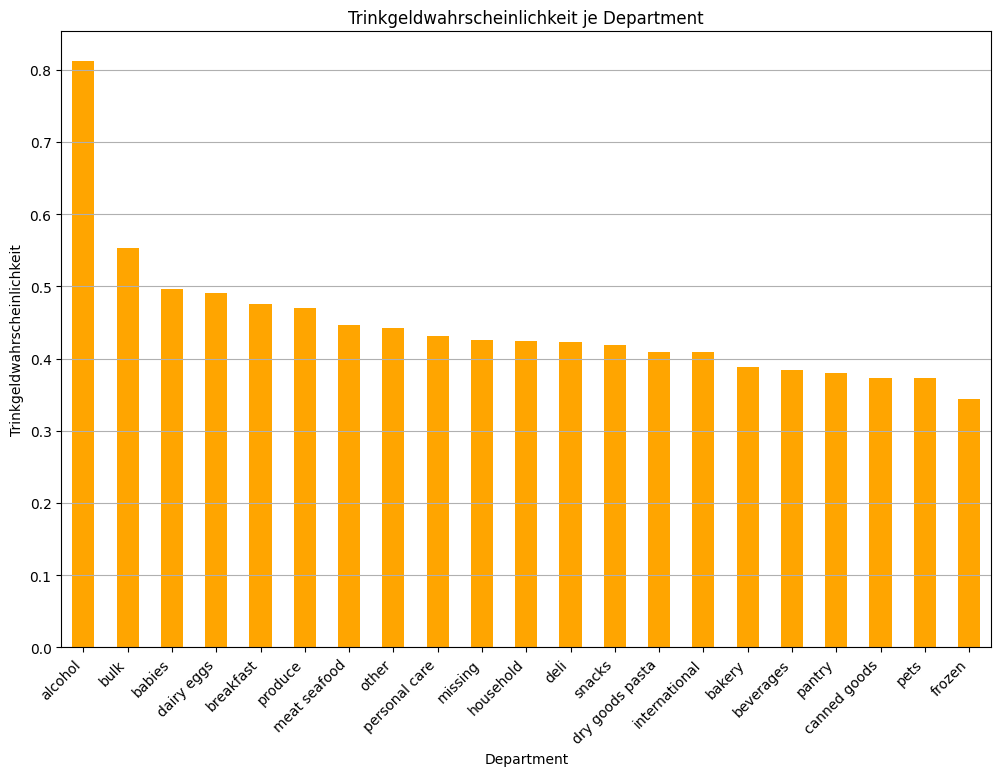

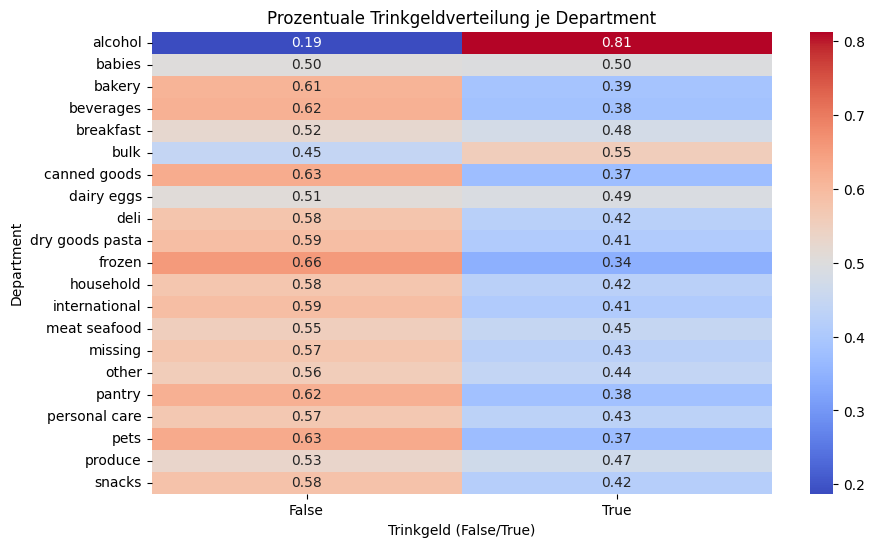

Chi-Quadrat-Test Ergebnis:
Chi2-Wert: 199364.84676203495, p-Wert: 0.0
Es besteht ein signifikanter Zusammenhang zwischen Trinkgeldverhalten und den Departments.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# 1. CSV-Dateien laden
aisles = pd.read_csv('./aisles.csv')
departments = pd.read_csv('./departments.csv')
order_products = pd.read_csv('./oder_products_s.csv')
orders = pd.read_csv('./oders_s.csv')
products = pd.read_csv('./products.csv')
tips = pd.read_csv('./tips.csv')

# 2. Datensätze kombinieren
# Verknüpfe Orders mit Tips
orders = orders.merge(tips, on='order_id', how='left')
missing_values = orders['tip'].isna().sum()
print(f"Anzahl der fehlenden Werte in 'tip': {missing_values}")
orders['tip'] = orders['tip'].fillna(False)  # Fehlende Werte in "tip" durch False ersetzen

# Verknüpfe Order-Produkte mit Produkt-Details
order_products = order_products.merge(products, on='product_id', how='left')

# Verknüpfe Orders mit Order-Produkten
order_details = orders.merge(order_products, on='order_id', how='inner')

# Verknüpfe mit Departments
order_details = order_details.merge(departments, on='department_id', how='left')

# 3. Häufigkeiten und Trinkgeldwahrscheinlichkeit pro Department berechnen
department_tips = pd.crosstab(order_details['department'], order_details['tip'], normalize='index')

# 4. Chi-Quadrat-Test
contingency_table = pd.crosstab(order_details['department'], order_details['tip'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

# 5. Visualisierung
plt.figure(figsize=(12, 8))
department_tips[True].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Trinkgeldwahrscheinlichkeit je Department')
plt.xlabel('Department')
plt.ylabel('Trinkgeldwahrscheinlichkeit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Zusätzliche Heatmap (optional)
plt.figure(figsize=(10, 6))
sns.heatmap(department_tips, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Prozentuale Trinkgeldverteilung je Department')
plt.ylabel('Department')
plt.xlabel('Trinkgeld (False/True)')
plt.show()

# 6. Ergebnisse ausgeben
print("Chi-Quadrat-Test Ergebnis:")
print(f"Chi2-Wert: {chi2}, p-Wert: {p}")
if p < 0.05:
    print("Es besteht ein signifikanter Zusammenhang zwischen Trinkgeldverhalten und den Departments.")
else:
    print("Kein signifikanter Zusammenhang zwischen Trinkgeldverhalten und den Departments.")

In [2]:
department_tips

tip,False,True
department,,
alcohol,0.187364,0.812636
babies,0.504119,0.495881
bakery,0.611636,0.388364
beverages,0.616332,0.383668
breakfast,0.524207,0.475793
bulk,0.446052,0.553948
canned goods,0.626607,0.373393
dairy eggs,0.508855,0.491145
deli,0.576212,0.423788


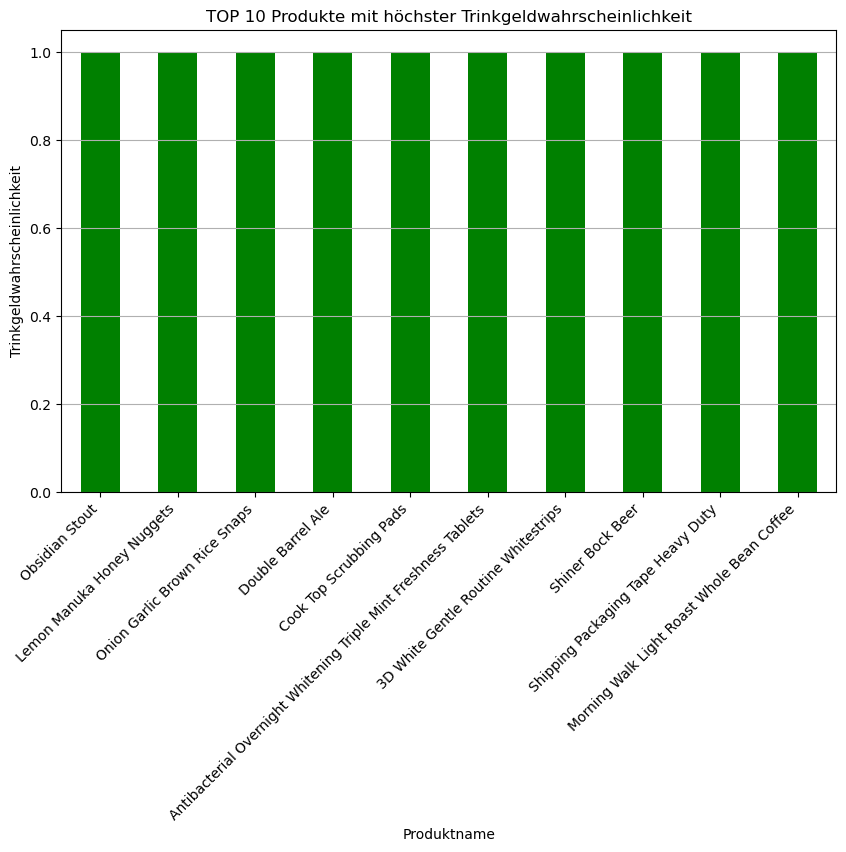

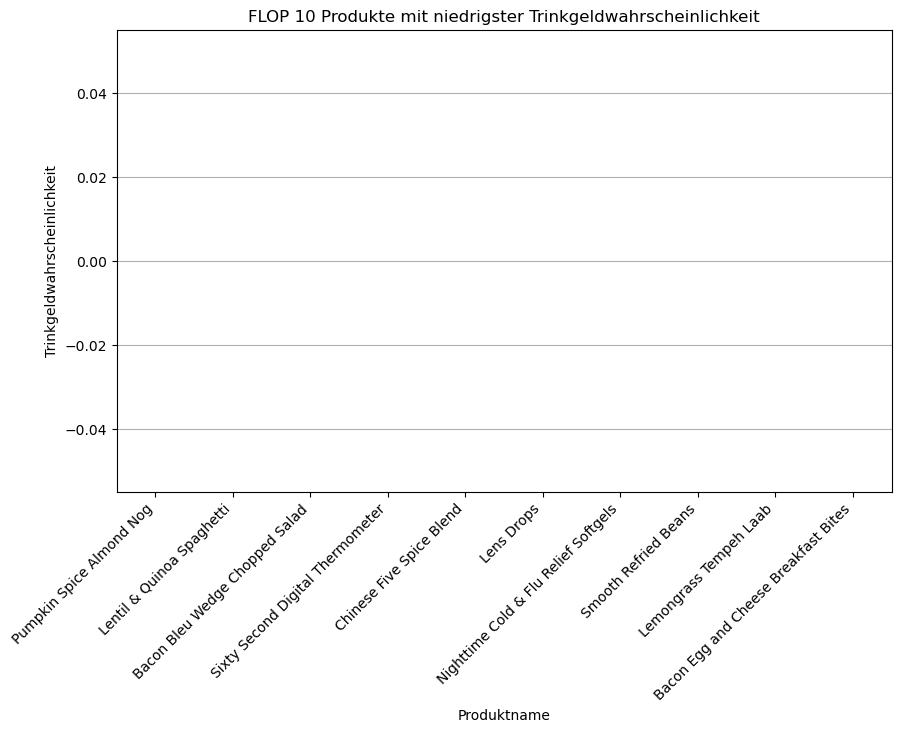

TOP 10 Produkte:
product_name
Obsidian Stout                                                     1.0
Lemon Manuka Honey Nuggets                                         1.0
Onion Garlic Brown Rice Snaps                                      1.0
Double Barrel Ale                                                  1.0
Cook Top Scrubbing Pads                                            1.0
Antibacterial Overnight Whitening Triple Mint Freshness Tablets    1.0
3D White Gentle Routine Whitestrips                                1.0
Shiner Bock Beer                                                   1.0
Shipping Packaging Tape Heavy Duty                                 1.0
Morning Walk Light Roast Whole Bean Coffee                         1.0
Name: tip, dtype: float64

FLOP 10 Produkte:
product_name
Pumpkin Spice Almond Nog                0.0
Lentil & Quinoa Spaghetti               0.0
Bacon Bleu Wedge Chopped Salad          0.0
Sixty Second Digital Thermometer        0.0
Chinese Five Spice Blend  

In [3]:
# 1. CSV-Dateien laden
import pandas as pd
import matplotlib.pyplot as plt

aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products = pd.read_csv('order_products_s.csv')
orders = pd.read_csv('orders_s.csv')
products = pd.read_csv('products.csv')
tips = pd.read_csv('tips.csv')

# 2. Datensätze kombinieren
# Verknüpfe Orders mit Tips
orders = orders.merge(tips, on='order_id', how='left')
orders['tip'] = orders['tip'].fillna(False)  # Fehlende Werte in "tip" durch False ersetzen

# Verknüpfe Order-Produkte mit Produkt-Details
order_products = order_products.merge(products, on='product_id', how='left')

# Verknüpfe Orders mit Order-Produkten
order_details = orders.merge(order_products, on='order_id', how='inner')

# 3. Trinkgeldwahrscheinlichkeit pro Produkt berechnen
product_tips = order_details.groupby('product_name')['tip'].mean()

# TOP 10 und FLOP 10 Produkte
top_10_products = product_tips.sort_values(ascending=False).head(10)
flop_10_products = product_tips.sort_values(ascending=True).head(10)

# 4. Visualisierung
# TOP 10
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='green')
plt.title('TOP 10 Produkte mit höchster Trinkgeldwahrscheinlichkeit')
plt.ylabel('Trinkgeldwahrscheinlichkeit')
plt.xlabel('Produktname')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# FLOP 10
plt.figure(figsize=(10, 6))
flop_10_products.plot(kind='bar', color='red')
plt.title('FLOP 10 Produkte mit niedrigster Trinkgeldwahrscheinlichkeit')
plt.ylabel('Trinkgeldwahrscheinlichkeit')
plt.xlabel('Produktname')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# 5. Ergebnisse ausgeben
print("TOP 10 Produkte:")
print(top_10_products)

print("\nFLOP 10 Produkte:")
print(flop_10_products)
